# Dataset

## Download dataset
Vietnamese Students' Feedback Corpus (UIT-VSFC) is the resource consists of over 16,000 sentences which are human-annotated with two different tasks: sentiment-based and topic-based classifications.

[1] Kiet Van Nguyen, Vu Duc Nguyen, Phu Xuan-Vinh Nguyen, Tham Thi-Hong Truong, Ngan Luu-Thuy Nguyen, UIT-VSFC: Vietnamese Students' Feedback Corpus for Sentiment Analysis,  2018 10th International Conference on Knowledge and Systems Engineering (KSE 2018), November 1-3, 2018, Ho Chi Minh City, Vietnam

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [2]:
from datasets import load_dataset
dataset = load_dataset("uitnlp/vietnamese_students_feedback")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.79k [00:00<?, ?B/s]

vietnamese_students_feedback.py:   0%|          | 0.00/4.97k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/475k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/63.3k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/134k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11426 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1583 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3166 [00:00<?, ? examples/s]

## Interacting with the downloaded data

In [3]:
train_set = dataset['train']
train_set

Dataset({
    features: ['sentence', 'sentiment', 'topic'],
    num_rows: 11426
})

In [10]:
train_set[0]

{'sentence': 'slide giáo trình đầy đủ .', 'sentiment': 2, 'topic': 1}

In [11]:
len(train_set)

11426

## Split a sentence

In [12]:
# Read a sentence
example_word_list = train_set[0]['sentence']
example_word_list

'slide giáo trình đầy đủ .'

In [13]:
# Split sentence word-by-word
example_word_list.split()

['slide', 'giáo', 'trình', 'đầy', 'đủ', '.']

In [14]:
# Join words into 1 full sentence
sentence = ""
for word in example_word_list:
    sentence += word
sentence

'slide giáo trình đầy đủ .'

In [15]:
# Get 10 sentences to process
sentence_list = []
for idx in range(10):
    sentence = ""
    for word in train_set[idx]['sentence']:
        sentence += word
    sentence_list.append(sentence)
sentence_list

['slide giáo trình đầy đủ .',
 'nhiệt tình giảng dạy , gần gũi với sinh viên .',
 'đi học đầy đủ full điểm chuyên cần .',
 'chưa áp dụng công nghệ thông tin và các thiết bị hỗ trợ cho việc giảng dạy .',
 'thầy giảng bài hay , có nhiều bài tập ví dụ ngay trên lớp .',
 'giảng viên đảm bảo thời gian lên lớp , tích cực trả lời câu hỏi của sinh viên , thường xuyên đặt câu hỏi cho sinh viên .',
 'em sẽ nợ môn này , nhưng em sẽ học lại ở các học kỳ kế tiếp .',
 'thời lượng học quá dài , không đảm bảo tiếp thu hiệu quả .',
 'nội dung môn học có phần thiếu trọng tâm , hầu như là chung chung , khái quát khiến sinh viên rất khó nắm được nội dung môn học .',
 'cần nói rõ hơn bằng cách trình bày lên bảng thay vì nhìn vào slide .']

# Text processing

## N-grams
- N-grams are continuous sequences of words or symbols, or tokens in a document. In technical terms, they can be defined as the neighboring sequences of items in a document.
- We can use n-grams or multiple other text preprocessing algorithms by incorporating [`nltk`](https://www.nltk.org/) library.

In [16]:
example_sentence = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [20]:
from nltk import ngrams
import numpy as np

num_of_grams = np.arange(1, 4, 1) # Test 3 n-grams

print("Original sentence:", example_sentence[1])
print("==="*5)

for gram in num_of_grams:
    splitted_sentence = ngrams(example_sentence[1].split(), int(gram))

    print(f"{gram}-gram: ",end ='')
    n_grams_list = [ ' '.join(grams) for grams in splitted_sentence]
    print(n_grams_list)
    print()

Original sentence: This document is the second document.
1-gram: ['This', 'document', 'is', 'the', 'second', 'document.']

2-gram: ['This document', 'document is', 'is the', 'the second', 'second document.']

3-gram: ['This document is', 'document is the', 'is the second', 'the second document.']



## Extract features with n-grams

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vectorize_model = CountVectorizer(ngram_range = (1, 1))
n_grams_feature_vector = count_vectorize_model.fit_transform(example_sentence).toarray()
word_frequency = pd.DataFrame(data = n_grams_feature_vector, columns = count_vectorize_model.get_feature_names_out())
word_frequency.T

,0,1,2,3
and,0,0,1,0
document,1,2,0,1
first,1,0,0,1
is,1,1,1,1
one,0,0,1,0
second,0,1,0,0
the,1,1,1,1
third,0,0,1,0
this,1,1,1,1


In [24]:
count_vectorize_model = CountVectorizer(ngram_range = (1, 1))

n_grams_feature_vector = count_vectorize_model.fit_transform([sentence_list[5]]).toarray()

word_frequency = pd.DataFrame(data = n_grams_feature_vector, columns = count_vectorize_model.get_feature_names_out())

print('Example sentence:', sentence_list[5])
word_frequency

Example sentence: giảng viên đảm bảo thời gian lên lớp , tích cực trả lời câu hỏi của sinh viên , thường xuyên đặt câu hỏi cho sinh viên .


,bảo,cho,câu,của,cực,gian,giảng,hỏi,lên,lớp,lời,sinh,thường,thời,trả,tích,viên,xuyên,đảm,đặt
0,1,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,3,1,1,1


In [25]:
count_vectorize_model = CountVectorizer(ngram_range = (1, 2))

n_grams_feature_vector = count_vectorize_model.fit_transform(example_sentence).toarray()

word_frequency = pd.DataFrame(data = n_grams_feature_vector, columns = count_vectorize_model.get_feature_names_out())
word_frequency.T

,0,1,2,3
and,0,0,1,0
and this,0,0,1,0
document,1,2,0,1
document is,0,1,0,0
first,1,0,0,1
first document,1,0,0,1
is,1,1,1,1
is the,1,1,1,0
is this,0,0,0,1
one,0,0,1,0


## Problem set 1
Based on the UIT-VSFC dataset and the aforementioned information.
- Create an $n$-gram word frequency table, such that $n$ could be any number of your desire.
- With $n=1$ and $n=2$, what is the most popular word in the dataset ?
- With $n=1$ and $n=2$, what is the rarest word in the dataset ?
- What are the limitations of this data processing flow ? How can we overcome those ?


### Retrieve all sentences within the dataset

In [32]:
from typing import List

def get_all_sentences(dataset) -> List[str]:
    """
    Function to get all sentences and store them into a list of strings

    Args:
    dataset -- The subset (i.e., train/valid/test) in UIT-VSFC dataset

    Returns:
    A list of all sentences in a subset data of the UIT-VSFC.
    """

    list_all_sentence: list = []


    return dataset['sentence']

In [33]:
list_all_sentence: list = get_all_sentences(train_set)
print(f"#sentences within the dataset: {len(list_all_sentence)}")
print(f"Example sentence: {list_all_sentence[0]}")

#sentences within the dataset: 11426
Example sentence: slide giáo trình đầy đủ .


### Build the word frequency table

In [40]:
def n_gram_word_frequency(sentence_list: list,
                          n: int) -> pd.DataFrame:
    """
    Function to build a word frequency table based on n-grams

    Args:
    sentence_list (list) -- A list of all sentences needed for table constructing process
    n (int) -- Number of grams that we parse into this function

    Returns:
    A dataframe contains all words after conducting n-grams and their respective frequencies
    """

    A = CountVectorizer(ngram_range = (n,n))
    B= A.fit_transform(sentence_list).toarray()
    word_frequency_table = pd.DataFrame(data = B,
                                        columns = A.get_feature_names_out())

    return word_frequency_table

In [46]:
# Construct the table of word frequency
word_frequency_table_1 = n_gram_word_frequency(sentence_list=list_all_sentence,
                                             n=1)

word_frequency_table_2 = n_gram_word_frequency(sentence_list = list_all_sentence,
                                             n=2)
word_frequency_table_1.tail()

,10,100,10h,10h30,11,11doubledot55,11h30,11h55,12,12doubledot00,...,ấy,ẩn,ắt,ốc,ồn,ổn,ủa,ủng,ức,ứng
11421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**With  n=1  and  n=2 , what is the most popular word in the dataset ?**

In [49]:
#monogram table
index = word_frequency_table_1.sum().argmax()
word_frequency_table_1.columns[index]

'viên'

In [52]:
#bigram table
index = word_frequency_table_2.sum().argmax()
word_frequency_table_2.columns[index]

'sinh viên'

**With  n=1  and  n=2 , what is the most rarest word in the dataset ?**

In [71]:
len(word_frequency_table_1.T)

2459

In [54]:
#monogram_table
index = word_frequency_table_1.sum().argmin()
word_frequency_table_1.columns[index]

'10h'

In [53]:
#bigram table
index = word_frequency_table_2.sum().argmin()
word_frequency_table_2.columns[index]

'10 50'

## Stopwords

In [58]:
# Retrieve the stopword dictionary
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt

--2025-03-22 05:13:49--  https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20475 (20K) [text/plain]
Saving to: ‘vietnamese-stopwords.txt.1’

vietnamese-stopword 100%[===================>]  20.00K  --.-KB/s    in 0s      

2025-03-22 05:13:49 (85.0 MB/s) - ‘vietnamese-stopwords.txt.1’ saved [20475/20475]



In [59]:
# Observe stopwords list
vietnamese_stopword = open('vietnamese-stopwords.txt', 'r').read()
vietnamese_stopword = vietnamese_stopword.split('\n') # Separate lines by lines
print(f"#Number of stop words: {len(vietnamese_stopword)}")

#Number of stop words: 1942


In [57]:
# Stop words example
for sentence in vietnamese_stopword[:10]:
    print(sentence)

a lô
a ha
ai
ai ai
ai nấy
ai đó
alô
amen
anh
anh ấy


In [104]:
a = vietnamese_stopword
for i in range(len(a)):
  for j in range(len(a)):
    if len(a[i]) > len(a[j]):
      temp = a[i]
      a[i] = a[j]
      a[j] = temp

In [116]:
count = list(range(6))
for stop_word in a:
  count[len(stop_word.split())]+=1

for c,i in enumerate(count):
  print(f" len of {c} : {i}")

 len of 0 : 0
 len of 1 : 372
 len of 2 : 1492
 len of 3 : 74
 len of 4 : 14
 len of 5 : 5


**What are the limitations of this data processing flow? How can we overcome those?**

**Limitations:**
- **Bias in Popularity and Rarity:** Frequency-based analysis may be skewed if the dataset is imbalanced or biased toward certain topics, in this case, we may see "sinh vieen" or any term that related to the education + univeristy area is are more shown up inside our corpus.
- **Limited Context Understanding:** n-gram models lack deep semantic understanding and context beyond the specified n value.
- **Data Sparsity:** When using higher n-grams, the dataset may become sparse, leading to many unique combinations with low or zero frequency.-> time and space complexity increased
- **Out-of-Vocabulary (OOV) Issues:** Rare words or unseen n-grams during training might not appear in the dataset, causing difficulties in modeling.
- **Noise in Data:** The dataset may include noise like typos, special characters, or stopwords that can affect word frequency analysis.


**Overcoming Limitations:**
- **Data Cleaning:** Perform thorough preprocessing like removing stopwords, punctuation, and normalizing text to reduce noise.
- **Larger Contextual Models:** Implement more advanced models like for better semantic understanding.
- **Balancing the Dataset:** If possible, balance the dataset to reduce bias in frequency-based analysis.
- **Hybrid Approaches:** Combine n-gram analysis with deep learning techniques to leverage both statistical and semantic strengths.

## Term frequency - Invert document frequency (TF-IDF)


### TF
Term frequency (TF) is the number of times a given term appears in document

$$
tf(t) = f(t,d)\times\frac{1}{T}
$$
whereas, $f(t,d)$ is the frequency of the word $t$ in the document $d$, $T$ is the number of all words in that document.

In [132]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Declare TF vectorize
tf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                                use_idf=False, # only using TF
                                norm='l1')

tf_vectorizer.fit_transform(corpus)

tf_vectorized = tf_vectorizer.transform(corpus)


tf_output = tf_vectorized[:]

# Build TF table
words_tf_idf = pd.DataFrame(tf_output.T.todense(), index=tf_vectorizer.get_feature_names_out(), columns=['tf'])
words_tf_idf

,tf
and,0.000000
document,0.333333
first,0.000000
is,0.166667
one,0.000000
second,0.166667
the,0.166667
third,0.000000
this,0.166667


### IDF

Inverse Document Frequency, or abbreviated as IDF, measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones.

$$
idf(t) = \log\left(\frac{\text{#documents in the document set}}{\text{#documents with term}}\right) + 1
$$

In [126]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Configure settings for IDF vectorize
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                                    smooth_idf=False,
                                    use_idf=True,
                                    norm=None)

tf_idf_vectorizer.fit_transform(corpus)

# Retrieve only idf information
idf_vectorizer = tf_idf_vectorizer.idf_

# Join idf values into the previous dataframe
words_tf_idf['idf'] = idf_vectorizer

# Show dataframe with ascending values of idf
words_tf_idf.sort_values(by=['idf'])

,tf,idf
is,0.2,1.000000
the,0.2,1.000000
this,0.2,1.000000
document,0.2,1.287682
first,0.2,1.693147
and,0.0,2.386294
second,0.0,2.386294
one,0.0,2.386294
third,0.0,2.386294


### TF-IDF

Technically saying, TF-IDF is a score which is applied to every word in every document in our dataset. And for every word, the TF-IDF value increases with every appearance of the word in a document, but is gradually decreased with every appearance in other documents

$$
\text{tf-idf}= tf(t, d) \times idf(t)
$$

In [127]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1, 1),
                                    smooth_idf=False,
                                    use_idf=True,
                                    norm='l1')

tf_idf_vectorizer.fit_transform(corpus)

tf_idf_vectorized = tf_idf_vectorizer.transform(corpus)

tf_idf_output = tf_idf_vectorized[0]
words_tf_idf['tf-idf'] = tf_idf_output.T.todense()

words_tf_idf.sort_values(by=['tf-idf'])

,tf,idf,tf-idf
and,0.0,2.386294,0.000000
third,0.0,2.386294,0.000000
second,0.0,2.386294,0.000000
one,0.0,2.386294,0.000000
is,0.2,1.000000,0.167201
the,0.2,1.000000,0.167201
this,0.2,1.000000,0.167201
document,0.2,1.287682,0.215302
first,0.2,1.693147,0.283096


### Problem set 2
Based on the problem 1 and the instruction on TF, IDF, TF-IDF:
- (2a) Build the tf-idf table for the UIT-VSFC dataset with $n$-gram = 1 and $n$-gram = 2.
- (2b) Change a few hyperparameters in the `TfidfVectorizer` function (`smooth_idf`, `sublinear_tf` and `norm`) from problem 2a (*you could browse from this [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to discover which are the correct paramters to parse*). Explain the results differences collected after modifying hyperparameters.
- (2c) Which words has the lowest and the highest tf-idf values ? Do they differ from $n$-grams results ?
- (2d) Which limitations from $n$-grams that TF-IDF overcame ?

**Build the tf-idf table for the UIT-VSFC dataset with  n -gram = 1**

In [148]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

list_all_sentence
corpus = list_all_sentence


# TF =====================================================
# configuration
A =TfidfVectorizer(ngram_range=(1, 1),
                  use_idf=True,
                  norm='l1')

A.fit_transform(corpus)
B = A.transform(corpus)
C = B[0]

# Build TF table
words_tf_idf = pd.DataFrame(C.T.todense(), index=A.get_feature_names_out(), columns=['tf'])


# IDF=====================================================
B = A.idf_

# Join idf values into the previous dataframe
words_tf_idf['idf'] = B

# Show dataframe with ascending values of idf
words_tf_idf.sort_values(by=['idf'])


#Merge===================================================
A.fit_transform(corpus)

B = A.transform(corpus)

C = B[0]

words_tf_idf['tf-idf'] = C.T.todense()

words_tf_idf.sort_values(by=['tf-idf'])

,tf,idf,tf-idf
thú,0.000000,5.243868,0.000000
thí,0.000000,8.264293,0.000000
thía,0.000000,9.650587,0.000000
thích,0.000000,5.287488,0.000000
thòi,0.000000,9.245122,0.000000
...,...,...,...
giáo,0.178474,3.943477,0.178474
trình,0.184496,4.076534,0.184496
đủ,0.202504,4.474437,0.202504
đầy,0.216997,4.794658,0.216997


**Build the tf-idf table for the UIT-VSFC dataset with  n -gram = 2**

In [147]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

list_all_sentence
corpus = list_all_sentence


# TF =====================================================
# configuration
A =TfidfVectorizer(ngram_range=(2, 2),
                  use_idf=True,
                  norm='l1')

A.fit_transform(corpus)
B = A.transform(corpus)
C = B[0]

# Build TF table
words_tf_idf = pd.DataFrame(C.T.todense(), index=A.get_feature_names_out(), columns=['tf'])


# IDF=====================================================
B = A.idf_

# Join idf values into the previous dataframe
words_tf_idf['idf'] = B

# Show dataframe with ascending values of idf
words_tf_idf.sort_values(by=['idf'])


#Merge===================================================
A.fit_transform(corpus)

B = A.transform(corpus)

C = B[0]

words_tf_idf['tf-idf'] = C.T.todense()

words_tf_idf.sort_values(by=['tf-idf'])

,tf,idf,tf-idf
thu tốt,0.000000,8.397824,0.000000
thuyết cho,0.000000,9.245122,0.000000
thuyết bộ,0.000000,9.650587,0.000000
thuyết bọn,0.000000,9.650587,0.000000
thuyết bằng,0.000000,9.245122,0.000000
...,...,...,...
khó mà,0.000000,8.734296,0.000000
đầy đủ,0.167041,4.822273,0.167041
giáo trình,0.202431,5.843925,0.202431
trình đầy,0.310281,8.957440,0.310281


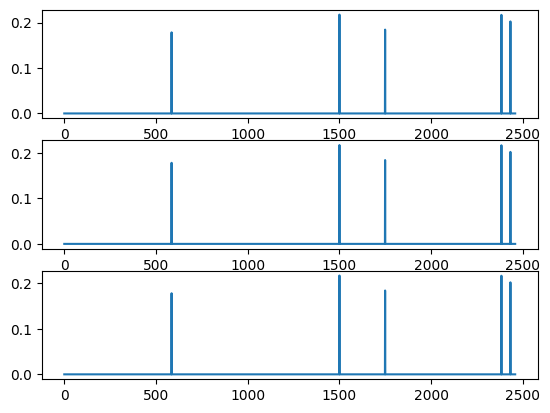

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(3)

for i,column in enumerate(words_tf_idf.columns):
  axis[i].plot(list(range(len(words_tf_idf))),words_tf_idf['tf'], b)

**smooth_idf**